In [1]:
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import shannon_entropy

In [9]:
data_dir = "./data/cifar10"
test_data = torchvision.datasets.ImageFolder(data_dir+'/train', transform=torchvision.transforms.ToTensor())

In [10]:
test_data[0]

(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
 
         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
 
         [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
          [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
          [0.8118, 0.8157, 0.8235,  ...,

In [11]:
ordered_data = [[] for x in range(10)]

for image, label in test_data:
    ordered_data[label].append(np.asarray(image))

In [12]:
entropies = []
for data in ordered_data:
    entropies.append(shannon_entropy(data))

7.896355908236728
7.919870886810368
7.848384107390756
7.925980204626159
7.7658740681881815
7.920724333157432
7.795079888489223
7.901627127626584
7.921456463345632
7.928643381892731


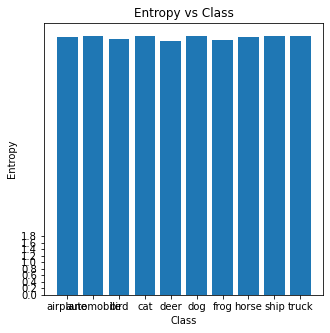

In [13]:
for y, x in enumerate(entropies):
    print(x)

numbers = test_data.classes
plt.figure(figsize=(5,5))
plt.bar(numbers, entropies)
plt.yticks(np.arange(0, 2, step=0.2))
plt.xticks(numbers)
plt.title("Entropy vs Class")
plt.xlabel("Class")
plt.ylabel("Entropy")
plt.show()

In [14]:
import pandas as pd
df = pd.DataFrame(entropies, columns=["Entropies"])
df["Classes"] = test_data.classes
print(df)

   Entropies     Classes
0   7.896356    airplane
1   7.919871  automobile
2   7.848384        bird
3   7.925980         cat
4   7.765874        deer
5   7.920724         dog
6   7.795080        frog
7   7.901627       horse
8   7.921456        ship
9   7.928643       truck


In [17]:
df.to_csv("Entropies.csv")